# Actividad 20

### Crea / Presenta la forma que creas más conveniente para describir qué grado por escuela tuvo el mejor puntaje en "reading" y con ello saber que genero es el que predomina en este filtro.

In [1]:
#Descargar librerias
import pandas as pd
import numpy as np
import matplotlib as plot

In [2]:
#Traer el archivo
data_students=pd.read_csv("clean_students_complete.csv")

In [3]:
#cambiar el indice
data_students.set_index('Student ID', inplace=True)

In [4]:
#eliminar una conlumna
data_students=data_students.drop(["Unnamed: 0"], axis=1)
data_students.head(3)

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60


In [5]:
#Buscar el maximo de reading
reading_max=data_students[data_students["reading_score"]==data_students["reading_score"].max()]
reading_max

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
22,Kimberly Stewart,F,11th,Huang High School,99,84
35,Benjamin Carlson,M,10th,Huang High School,99,61
78,Jason Thompson,M,12th,Huang High School,99,57
90,Ronald Garcia,M,9th,Huang High School,99,86
98,Virginia Ramirez,F,10th,Huang High School,99,89
...,...,...,...,...,...,...
38990,Amber Reynolds,F,12th,Thomas High School,99,87
39033,Michael Everett,M,11th,Thomas High School,99,91
39114,Gregory Taylor,M,10th,Thomas High School,99,77


In [6]:
gender_scname_rmax=reading_max[["gender", "school_name", "grade"]]
gender_scname_rmax

,gender,school_name,grade
Student ID,,,
22,F,Huang High School,11th
35,M,Huang High School,10th
78,M,Huang High School,12th
90,M,Huang High School,9th
98,F,Huang High School,10th
...,...,...,...
38990,F,Thomas High School,12th
39033,M,Thomas High School,11th
39114,M,Thomas High School,10th


In [7]:
dummies_genero_rmax=pd.get_dummies(reading_max[["gender"]])
dummies_genero_rmax.head()

,gender_F,gender_M
Student ID,,
22,1,0
35,0,1
78,0,1
90,0,1
98,1,0


In [8]:
plotbygen_rmax=pd.concat([gender_scname_rmax, dummies_genero_rmax], axis=1)
plotbygen_rmax

,gender,school_name,grade,gender_F,gender_M
Student ID,,,,,
22,F,Huang High School,11th,1,0
35,M,Huang High School,10th,0,1
78,M,Huang High School,12th,0,1
90,M,Huang High School,9th,0,1
98,F,Huang High School,10th,1,0
...,...,...,...,...,...
38990,F,Thomas High School,12th,1,0
39033,M,Thomas High School,11th,0,1
39114,M,Thomas High School,10th,0,1


In [13]:
plot_grouped_rmax=plotbygen_rmax.groupby(["school_name", "grade"]).sum()
plot_grouped_rmax.head(40)

gender_F  gender_M
school_name           grade                    
Bailey High School    10th         10         8
                      11th         15        12
                      12th         13        20
                      9th          20        16
Cabrera High School   10th         10         8
                      11th          5         8
                      12th          8         5
                      9th           4        10
Figueroa High School  10th         14        13
                      11th         12        15
                      12th         12         9
                      9th          12        12
Ford High School      10th          8         8
                      11th         10         4
                      12th          6         6
                      9th          11         6
Griffin High School   10th          8         6
                      11th          2         5
                      12th          2        10
                      9th          10         9
Hernandez High School 10th         16        12
                      11th         13        16
                      12th         15        14
                      9th          20        18
Holden High School    10th          1         2
                      11th          5         0
                      12th          1         1
                      9th           0         2
Huang High School     10th         11        14
                      11th          5        11
                      12th          6         4
                      9th          13        11
Johnson High School   10th         17        11
                      11th         16        14
                      12th          9        11
                      9th          21        15
Pena High School      10th          4         5
                      11th          6         8
                      12th          3         8
                      9th           3         4

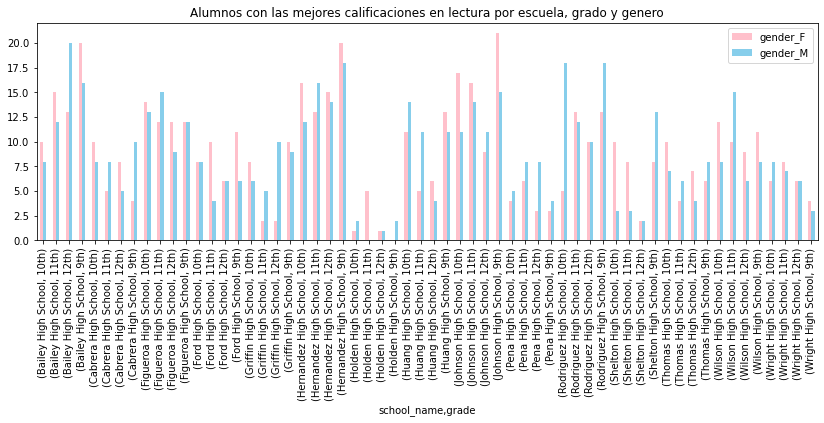

In [14]:
plotbar_max=plot_grouped_rmax.plot(kind="bar",color=["pink", "skyblue"],figsize=(14,4), title='Alumnos con las mejores calificaciones en lectura por escuela, grado y genero')

###### Se puede observar en el gráfico que la escuela Johnson High School es la que tiene la mayor cantidad de alumnos con mejor puntaje en reading, se encuentran en noveno grado  y son del genero femenino.